In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
cwd = os.getcwd()

In [4]:
image_dir = os.path.join(cwd, 'Brightwork-master/image_timeseries/')

In [5]:
files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

In [6]:
redperimage = []
greperimage = []

In [7]:
for image in files:
    img = plt.imread(os.path.join(image_dir, image))
    reds = img[:,:,0]
    redperimage.append( np.sum(reds))
    greens = img[:,:,1]
    greperimage.append( np.sum(greens))

In [8]:
redperimage = np.array(redperimage, dtype=float)
greperimage = np.array(greperimage, dtype=float)

In [9]:
ratio = redperimage / greperimage
ratio

array([ 0.77500579,  0.81940444,  0.69021933,  0.56952228,  0.66652444,
        0.76387617,  0.6872677 ,  0.64592815,  0.71914821,  0.64484708,
        0.81951841,  0.67618549,  0.6753137 ,  0.59929252,  0.77494919,
        0.59831546])

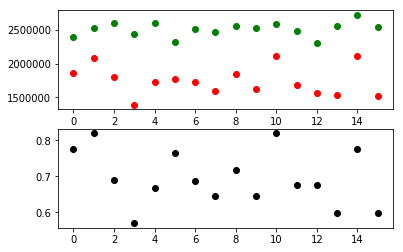

In [13]:
plt.subplot(211)
plt.plot(range(0, len(redperimage)), redperimage, 'ro')
plt.plot(range(0, len(greperimage)), greperimage, 'go')

plt.subplot(212)
plt.plot(range(0, len(ratio)), ratio, 'ko')

plt.show()

In [15]:
sequence_dir = os.path.join(cwd, 'Brightwork-master/sequencing/')
sequences = os.path.join(sequence_dir, 'sequencereads.txt')

In [16]:
my_seqs = np.genfromtxt(sequences, delimiter='\n', dtype=str)

In [17]:
print my_seqs.size

1861344


In [18]:
molecular_weight_dict = {"A":89.09, "R":174.2, "D":133.1, "N":132.12, "C":121.16, "E":147.13, "Q":146.14, "G":75.07, "H":155.15, "I":131.17, "L":131.17, "K":146.19, "M":149.21, "F":165.19, "P":115.13, "S":105.09, "T":119.12, "W":204.23, "Y":181.19, "V":117.15, "X":0.0}

In [19]:
def Calculate_molecular_weight(sequence):
    mw = 0
    for i in list(sequence):
        mw += molecular_weight_dict[i]
    return mw

In [20]:
NumpyMW = np.vectorize(Calculate_molecular_weight)

In [21]:
MWs = NumpyMW(my_seqs)

In [22]:
print 'Average MW: ', np.mean(MWs)
print 'Standard Dev. MW: ', np.std(MWs)

Average MW:  900.307822487
Standard Dev. MW:  97.1988503619


In [23]:
import time

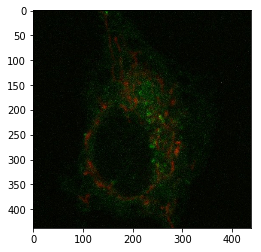

In [38]:
image = plt.imread(os.path.join(image_dir, 'img_0001.jpg'))
image.setflags(write=1)
plt.imshow(image)

In [39]:
time1 = time.time()

image[ image[:,:,1] < 40 ] = 0

time2 = time.time()

timevec = time2 - time1
print 'time for vectorized: ', timevec

time for vectorized:  0.00681304931641


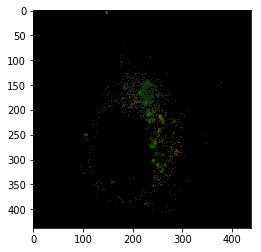

In [40]:
plt.imshow(image)

In [43]:
#fig_path = os.path.join(cwd, 'Brightwork-master/Animate_figs/figs/')
fig_csv_path = os.path.join(cwd, 'Brightwork-master/Animate_figs/', 'A10Bleb_pct_chg_smoothed.csv')

In [44]:
tmsrs = np.genfromtxt(fig_csv_path, delimiter=',')

In [45]:
figdir = os.path.join(cwd, 'Brightwork-master/Animate_figs/figsTest/')

In [46]:
nums = xrange(0, tmsrs.shape[1])

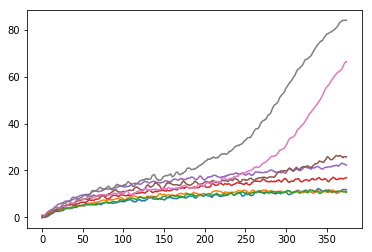

In [49]:
plt.plot(tmsrs.T * -1)
plt.show()

In [50]:
timepoint5 = tmsrs.T[5]
timepoint5

array([-0.89993599, -1.14007362, -0.41965937, -1.12263822, -1.5358323 ,
       -0.11072738, -1.56371868, -1.13427243])

In [61]:
for timepoint, num in zip(tmsrs.T, nums):
    length = timepoint.shape[0]
    myrange = range(1, length+1)
    fig = plt.figure()
    
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.xlim([0, 100])
    """
    ax.text(0, 1, '    # 1', color='r', size=15, verticalalignment='center')
    ax.text(0, 2, '    # 2', color='r', size=15, verticalalignment='center')
    ax.text(0, 3, '    # 3', color='r', size=15, verticalalignment='center')
    ax.text(0, 4, '    # 4', color='r', size=15, verticalalignment='center')
    ax.text(0, 5, '    # 5', color='r', size=15, verticalalignment='center')
    ax.text(0, 6, '    # 6', color='r', size=15, verticalalignment='center')
    ax.text(0, 7, '    # 7', color='r', size=15, verticalalignment='center')
    ax.text(0, 8, '    # 8', color='r', size=15, verticalalignment='center')
    """
    timepoint *= -1
    plt.barh(myrange, timepoint, color = 'k', align='center')
    plt.title("Watch them grow")
    plt.xlabel("Signal")
    
    plt.savefig(os.path.join(figdir, 'timepoint_%s.png' %num))
    plt.close()

In [62]:
import scipy.misc
import scipy.optimize
from os.path import join as join2

np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [63]:
user_concentrations = '10 5 2.5 1.25 .625 .0625 .00625 pbs'

In [64]:
data = np.array([0.227, 0.718, 0.773, 1.064, 1.256, 1.437, 1.614, 1.411])

In [66]:
concs_nums = []
for i in user_concentrations.split():
    try:
        num = eval(i)
    except:
        num = 0
    concs_nums.append(num)

In [67]:
save_dir = os.path.join(cwd, 'Brightwork-master/IC50stuff/')
os.chdir(save_dir)

In [68]:
ec50s_file = open('IC50s.txt', 'w')

In [69]:
rangeconc = np.arange(0, np.max(concs_nums), 0.1)

def x_for_known_y_sig( sigmoid, p ):
    '''Get the value of x, based on known y by choosing an average of the x's near that y'''
    fit = [ (x, sigmoid(p, x)) for x in rangeconc ]  # list of tuples containing x and f(x) values
    near50 = []
    for tup in fit:
        if tup[1] > 0.48 and tup[1] < 0.52:  # get x values near f(x) = 0.5
            x = tup[0]
            near50.append(x)
    EC50 = np.mean(np.array(near50))
    return EC50

def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def residuals(p,x,y):
    return y - sigmoid(p,x)

def Plot_dose_response_sig(data, save_fig, save_data, namedata):
    '''This function normalizes a set of data points for plotting on a dose response curve.
       They are normalized so that the highest drug concentration's data = 0, lowest = 1.
       A sigmoidal is fit to the data, and we measure where 0.5 (50% effect) crosses on that line.'''

    normalized = (data - data[0]) / (data[-1] - data[0])
    normalized = np.absolute(normalized)
    np.savetxt( join2(save_dir, save_data), normalized, delimiter=',')
    
    p_guess = ( np.median( concs_nums ),np.median( normalized ),1.0,1.0 )
    p, cov, infodict, mesg, ier = scipy.optimize.leastsq(residuals, p_guess, args=(concs_nums, normalized), full_output=1)  

    x0,y0,c,k = p
    pxp = sigmoid(p, rangeconc)

    ss_err =(infodict['fvec']**2).sum()
    ss_tot =((normalized - normalized.mean())**2).sum()
    r_squared = 1- (ss_err / ss_tot)

    EC50 = x_for_known_y_sig( sigmoid, p )
    ec50s_file.write(('%s Endpoint\t EC50 = ' %namedata + '%.3f' %EC50 + '\tR-squared = ' + '%.3f' %r_squared + '\n'))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xscale('log')
    plt.scatter(concs_nums, normalized, s=75, color='#756E71')
    plt.ylabel('effect (0 to 1)')
    plt.xlabel('concentration')
    plt.plot(rangeconc, pxp, 'k', EC50, sigmoid(p, EC50), 'r<', ms=9)
    ax.tick_params(axis='x') 
    ax.xaxis.tick_bottom()
    ax.tick_params(axis='y')
    ax.yaxis.tick_left()
    plt.grid(True)
    plt.savefig( join2(save_dir, save_fig))
    plt.close()

def x_for_known_y_poly(f):
    '''Get the value of x, based on known y by choosing an average of the x's near that y'''
    fit = [ (x, f(x)) for x in rangeconc ]  # list of tuples containing x and f(x) values
    near50 = []
    for tup in fit:
        if tup[1] > 0.48 and tup[1] < 0.52:  # get x values near f(x) = 0.5
            x = tup[0]
            near50.append(x)
    EC50 = np.mean(np.array(near50))
    return EC50

def Plot_dose_response_poly(data, save_fig, save_data, ec50_poly, save_poly_coeffs, namedata):
    '''This function normalizes a set of data points for plotting on a dose response curve.
       They are normalized so that the highest drug concentration's data = 0, lowest = 1.
       A polynomial is fit to the data, and we measure where 0.5 (50% effect) crosses on that line.'''
    normalized = (data - data[0]) / (data[-1] - data[0])
    normalized = np.absolute(normalized)
    np.savetxt( join2(save_dir, save_data), normalized, delimiter=',')
    # fit a 3 degree polynomial. nm is the ranks and other crap
    poly_coeffs, residual, nm1, nm2, nm3 = np.polyfit(concs_nums, normalized, ec50_poly, full=True)
    r_squared = 1 - residual / (len(normalized) * normalized.var())
    # make a function out of it
    f = np.poly1d(poly_coeffs)
    np.savetxt( join2(save_dir, save_poly_coeffs), f)
    EC50 = x_for_known_y_poly(f)
    ec50s_file.write(('%s Endpoint\t EC50 = ' %namedata + '%.3f' %EC50 + '\tR-squared = ' + '%.3f' %r_squared + '\n'))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xscale('log')
    plt.scatter(concs_nums, normalized, s=75, color='#756E71')
    plt.ylabel('effect (0 to 1)')
    plt.xlabel('concentration')
    plt.plot(rangeconc, f(rangeconc),'k', EC50, f(EC50),'r<', ms=8)
    plt.grid(True)
    ax.tick_params(axis='x') 
    ax.xaxis.tick_bottom()
    ax.tick_params(axis='y')
    ax.yaxis.tick_left()
    plt.savefig( join2(save_dir, save_fig))
    plt.close() 

def Run_ec50_plotting():
    Plot_dose_response_sig(data, 'dose_response_sig.png', 'normalized_for_EC50_sig.csv', 'Sigmoidal')
    Plot_dose_response_poly(data, 'dose_response_poly.png', 'normalized_for_EC50_poly.csv', 2, 'polynomial_coeffs.txt', 'Polynomal')
